# Fitting a GPR Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.gaussian_process import GaussianProcessRegressor

sns.set_style("whitegrid")

In [2]:
data = pd.read_excel("./data/dataSine.xlsx", sheet_name='data')
data_train = pd.read_excel("./data/dataSine.xlsx", sheet_name='dataTrain')
data_test = pd.read_excel("./data/dataSine.xlsx", sheet_name='dataTest')
data.head()

,x,y
0,0.0108,2.5479
1,0.0693,2.5475
2,0.0201,2.6603
3,0.1152,2.8285
4,0.1370,2.8607


We can use the [GaussianProcessRegressor()](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html#sklearn-gaussian-process-gaussianprocessregressor) class to fit a model using Gaussian process regression.

In [3]:
regressor = GaussianProcessRegressor()
regressor.fit(data_train.x.to_frame(), data_train.y)

y_pred = regressor.predict(data_test.x.to_frame())
print("R^2 =", regressor.score(data_test.x.to_frame(), data_test.y))
print("MSE =", mean_squared_error(data_test.y, y_pred))

R^2 = 0.9447756456678292
MSE = 0.11771351127046698


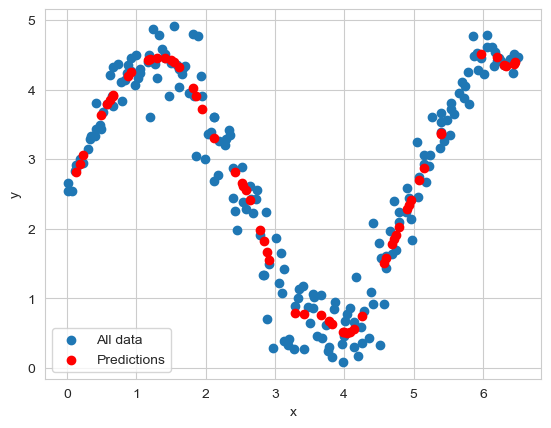

In [4]:
plt.figure()
plt.scatter(data.x, data.y)
plt.scatter(data_test.x, y_pred, color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["All data", "Predictions"])
plt.show()